In [1]:
from autotst.reaction import *
from autotst.molecule import *
from autotst.conformer.utilities import *
from autotst.conformer.simple_es import *
from autotst.conformer.ga import *
from autotst.conformer.brute_force import *
import time

from ase.visualize import view

thermo.py:839 loadLibraries INFO Loading thermodynamics library from primaryThermoLibrary.py in /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from CBS_QB3_1dHR.py in /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/libraries...
thermo.py:856 loadGroups INFO Loading thermodynamics group database from /Users/nathan/Code/RMG-Py/../RMG-database/input/thermo/groups...
transport.py:294 loadGroups INFO Loading transport group database from /Users/nathan/Code/RMG-Py/../RMG-database/input/transport/groups...
database.py:167 loadFamilies INFO Loading the user-specified kinetics families from /Users/nathan/Code/RMG-Py/../RMG-database/input/kinetics/families
statmech.py:526 loadGroups INFO Loading frequencies group database from /Users/nathan/

In [2]:
rxn = AutoTST_Reaction("CCCCC+[O]O_[CH2]CCCC+OO", "H_Abstraction")
rxn

reaction.py:122 __init__ INFO Label provided: CCCCC+[O]O_[CH2]CCCC+OO
reaction.py:123 __init__ INFO Family provided: H_Abstraction
reaction.py:233 get_rmg_reactions INFO The distance data is as follows: 
DistanceData(distances={'d12': 1.380401,'d13': 2.530343,'d23': 1.157074,}, uncertainties={'d12': 0.385038,'d13': 0.208449,'d23': 0.303191,}, comment=u'Matched node C/H3/Cs ([<Entry index=118 label="C/H3/Cs">, <Entry index=262 label="Cdj_CdsCs">])\nMatched node OjO ([<Entry index=126 label="C/H2/Cd/Cd">, <Entry index=32 label="OjO">])\n')
reaction.py:351 get_labels INFO The labled atoms are [2, 8, 0].
reaction.py:296 create_rdkit_ts_geometry INFO Initially embedded molecule
reaction.py:299 create_rdkit_ts_geometry INFO Editing bounds matrix
reaction.py:366 set_limits INFO For atoms 2 and 8 we have a distance of: 	 1.380401
reaction.py:366 set_limits INFO For atoms 8 and 0 we have a distance of: 	 1.157074
reaction.py:366 set_limits INFO For atoms 2 and 0 we have a distance of: 	 2.53034

<autotst.reaction.AutoTST_Reaction instance at 0x112a69b00>

In [3]:
view(rxn.ts.ase_ts)

In [4]:
r1 = AutoTST_Molecule("CCCCC")
r2 = AutoTST_Molecule("[O]O")
p1 = AutoTST_Molecule("[CH2]CCCC")
p2 = AutoTST_Molecule("OO")

reacts = [r1, r2]
prods = [p1, p2]
rmg_reacts = []
rmg_prods = []
for reactant_mol in reacts:
    rmg_reacts.append(reactant_mol.rmg_molecule)

for product_mol in prods:
    rmg_prods.append(product_mol.rmg_molecule)

#rmg_reacts = [r1.rmg_molecule, r2.rmg_molecule]
#rmg_prods = [p1.rmg_molecule, p2.rmg_molecule]
rmg_reacts, rmg_prods

([Molecule(SMILES="CCCCC"), Molecule(SMILES="[O]O")],
 [Molecule(SMILES="[CH2]CCCC"), Molecule(SMILES="OO")])

In [5]:
labeled_r, labeled_p = family.getLabeledReactantsAndProducts(rmg_reacts, rmg_prods)

In [6]:
labeled_rxn = Reaction(reactants=labeled_r, products=labeled_p)
labeled_rxn

In [7]:
for rxn in family.generateReactions(rmg_reacts, rmg_prods):
    if labeled_rxn.isIsomorphic(rxn):
        print type(rxn.reactants[0])
        rxn.reactants = labeled_rxn.reactants
        rxn.products = labeled_rxn.products
        break
        
print [rxn]
rxn

<type 'rmgpy.molecule.molecule.Molecule'>
[TemplateReaction(reactants=[Molecule(SMILES="CCCCC"), Molecule(SMILES="[O]O")], products=[Molecule(SMILES="OO"), Molecule(SMILES="[CH2]CCCC")], pairs=[[Molecule(SMILES="CCCCC"), Molecule(SMILES="[CH2]CCCC")], [Molecule(SMILES="[O]O"), Molecule(SMILES="OO")]], family='H_Abstraction', template=['C/H3/Cs', 'OjO'])]


In [8]:
ts_database.groups.estimateDistancesUsingGroupAdditivity(rxn)

DistanceData(distances={'d12': 1.380401,'d13': 2.530343,'d23': 1.157074,}, uncertainties={'d12': 0.385038,'d13': 0.208449,'d23': 0.303191,}, comment=u'Matched node C/H3/Cs ([<Entry index=118 label="C/H3/Cs">, <Entry index=262 label="Cdj_CdsCs">])\nMatched node OjO ([<Entry index=126 label="C/H2/Cd/Cd">, <Entry index=32 label="OjO">])\n')

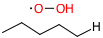

In [9]:
merged_reacts = Molecule.merge(rxn.reactants[0], rxn.reactants[1])

merged_prods = Molecule.merge(rxn.products[0], rxn.products[1])

merged_reacts

In [10]:
merged_reacts.updateMultiplicity()
#merged_reacts.multiplicity

In [11]:
import py3Dmol

In [12]:
def view_mol(mol):
    """
    A method designed to create a 3D figure of the Multi_Molecule with py3Dmol
    """

    mb = Chem.MolToMolBlock(mol)
    p = py3Dmol.view(width=400, height=400)
    p.addModel(mb, "sdf")
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()

In [13]:
rdmol = merged_reacts.toRDKitMol(removeHs=False)
Chem.rdDistGeom.EmbedMolecule(rdmol)
view_mol(rdmol)

In [14]:
bm = rdkit.Chem.rdDistGeom.GetMoleculeBoundsMatrix(rdmol)
bm

array([[0.00000000e+00, 1.32600000e+00, 1.00000000e+03, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.93274314e+00,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00000000e+03],
       [1.30600000e+00, 0.00000000e+00, 1.00000000e+03, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00025420e+00,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 1.00000000e+03, 1.00000000e+03],
       [3.65000000e+00, 3.65000000e+00, 0.00000000e+00, 1.00000000e+03,
        1.52400000e+00, 3.81071948e+00, 2.51279063e+00, 1.00000000e+03,
        1.11940079e+00, 1.11940079e+00, 1.11940079e+00, 1.00000000e+03,
        1.00000000e+03, 1.00000000e+03, 2.19506659e+00, 2.1950

Checking that the RMG molecule and RDKit molecule are ordered the same

In [15]:
for i, atom in enumerate(merged_reacts.atoms):
    print atom, rdmol.GetAtoms()[i].GetAtomicNum(), atom.label
    if atom.label == "*1":
        print "The {}th atom is the *1 atom".format(i)
        lbl1 = i
    if atom.label == "*2":
        print "The {}th atom is the *2 atom".format(i)
        lbl2 = i
    if atom.label == "*3":
        print "The {}th atom is the *3 atom".format(i)
        lbl3 = i
        
labels = (lbl1, lbl2, lbl3)
labels

O. 8 *3
The 0th atom is the *3 atom
O 8 
C 6 *1
The 2th atom is the *1 atom
C 6 
C 6 
C 6 
C 6 
H 1 
H 1 *2
The 8th atom is the *2 atom
H 1 
H 1 
H 1 
H 1 
H 1 
H 1 
H 1 
H 1 
H 1 
H 1 
H 1 


(2, 8, 0)

### I THINK THERE IS AN ISSUE WITH FINDING LABELED ATOMS